

This notebook contains an example for teaching.


In [8]:
install.packages(c("glmnet","hdm","xtable"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Penalized Linear Regressions: A Simulation Experiment

## Data Generating Process: Approximately Sparse

[1] "theoretical R2:"   "0.826881788964026"


0.8268818


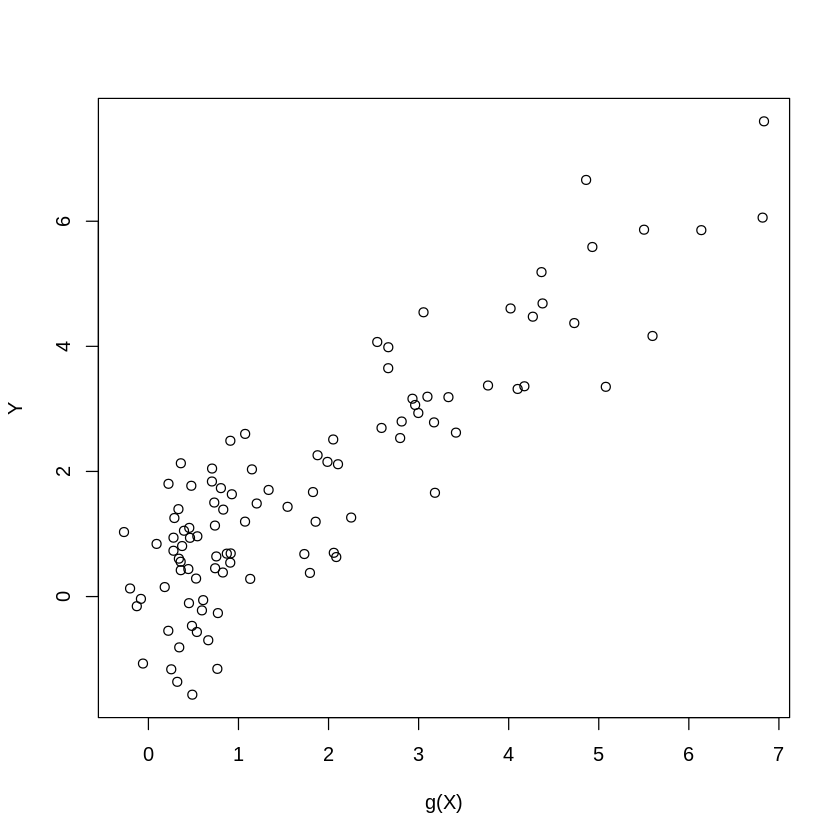

In [9]:
set.seed(1)

n = 100;
p = 400;

Z= runif(n)-1/2;
W = matrix(runif(n*p)-1/2, n, p);



beta = 1/seq(1:p)^2;   # approximately sparse beta
#beta = rnorm(p)*.2    # dense beta
gX = exp(4*Z)+ W%*%beta;  # leading term nonlinear, regression function
X = cbind(Z, Z^2, Z^3, W);  # polynomials in Zs will be approximating exp(4*Z)


Y = gX + rnorm(n);    #generate Y


plot(gX,Y, xlab="g(X)", ylab="Y")    #plot V vs g(X)

print( c("theoretical R2:", var(gX)/var(Y)))

var(gX)/var(Y); #theoretical R-square in the simulation example





We use package Glmnet to carry out predictions using cross-validated lasso, ridge, and elastic net

In [10]:
set.seed(123)
library(glmnet)
fit.lasso.cv   <- cv.glmnet(X, Y, family="gaussian", alpha=1)  # family gaussian means that we'll be using square loss
fit.ridge   <- cv.glmnet(X, Y, family="gaussian", alpha=0)     # family gaussian means that we'll be using square loss
fit.elnet   <- cv.glmnet(X, Y, family="gaussian", alpha=.5)    # family gaussian means that we'll be using square loss

yhat.lasso.cv    <- predict(fit.lasso.cv, newx = X)            # predictions
yhat.ridge   <- predict(fit.ridge, newx = X)
yhat.elnet   <- predict(fit.elnet, newx = X)

MSE.lasso.cv <- summary(lm((gX-yhat.lasso.cv)^2~1))$coef[1:2]  # report MSE and standard error for MSE for approximating g(X)
MSE.ridge <- summary(lm((gX-yhat.ridge)^2~1))$coef[1:2]        # report MSE and standard error for MSE for approximating g(X)
MSE.elnet <- summary(lm((gX-yhat.elnet)^2~1))$coef[1:2]        # report MSE and standard error for MSE for approximating g(X)

# alternativ
MSE.l <- mean((gX-yhat.lasso.cv)^2)

MSE.lasso.cv
MSE.l

[1] 0.44990852 0.07675265

[1] 0.4499085

In [11]:
?glmnet

Here we compute the lasso and ols post lasso using plug-in choices for penalty levels, using package hdm

In [16]:
library(hdm)
fit.rlasso  <- rlasso(Y~X,  post=FALSE)      # lasso with plug-in penalty level
fit.rlasso.post <- rlasso(Y~X,  post=TRUE)    # post-lasso with plug-in penalty level

yhat.rlasso   <- predict(fit.rlasso)            #predict g(X) for values of X
yhat.rlasso.post   <- predict(fit.rlasso.post)  #predict g(X) for values of X

MSE.lasso <- summary(lm((gX-yhat.rlasso)^2~1))$coef[1:2]       # report MSE and standard error for MSE for approximating g(X)
MSE.lasso.post <- summary(lm((gX-yhat.rlasso.post)^2~1))$coef[1:2]  # report MSE and standard error for MSE for approximating g(X)

MSE.lasso
MSE.2 <- mean((gX-yhat.rlasso)^2)
MSE.2


[1] 0.14821903 0.02670577

[1] 0.148219

In [17]:
library(xtable)
table<- matrix(0, 5, 2)
table[1,1:2]   <- MSE.lasso.cv
table[2,1:2]   <- MSE.ridge
table[3,1:2]   <- MSE.elnet
table[4,1:2]   <- MSE.lasso
table[5,1:2]   <- MSE.lasso.post

colnames(table)<- c("MSA", "S.E. for MSA")
rownames(table)<- c("Cross-Validated Lasso", "Cross-Validated ridge","Cross-Validated elnet",
                    "Lasso","Post-Lasso")
tab <- xtable(table, digits =3)
print(tab,type="latex") # set type="latex" for printing table in LaTeX
tab



% latex table generated in R 4.5.0 by xtable 1.8-4 package
% Wed May 14 11:44:08 2025
\begin{table}[ht]
\centering
\begin{tabular}{rrr}
  \hline
 & MSA & S.E. for MSA \\ 
  \hline
Cross-Validated Lasso & 0.450 & 0.077 \\ 
  Cross-Validated ridge & 2.245 & 0.348 \\ 
  Cross-Validated elnet & 0.343 & 0.054 \\ 
  Lasso & 0.148 & 0.027 \\ 
  Post-Lasso & 0.085 & 0.009 \\ 
   \hline
\end{tabular}
\end{table}


,MSA,S.E. for MSA
,<dbl>,<dbl>
Cross-Validated Lasso,0.4499085,0.076752654
Cross-Validated ridge,2.2446796,0.348252832
Cross-Validated elnet,0.3426569,0.054365421
Lasso,0.1482190,0.026705771
Post-Lasso,0.0845236,0.009469643


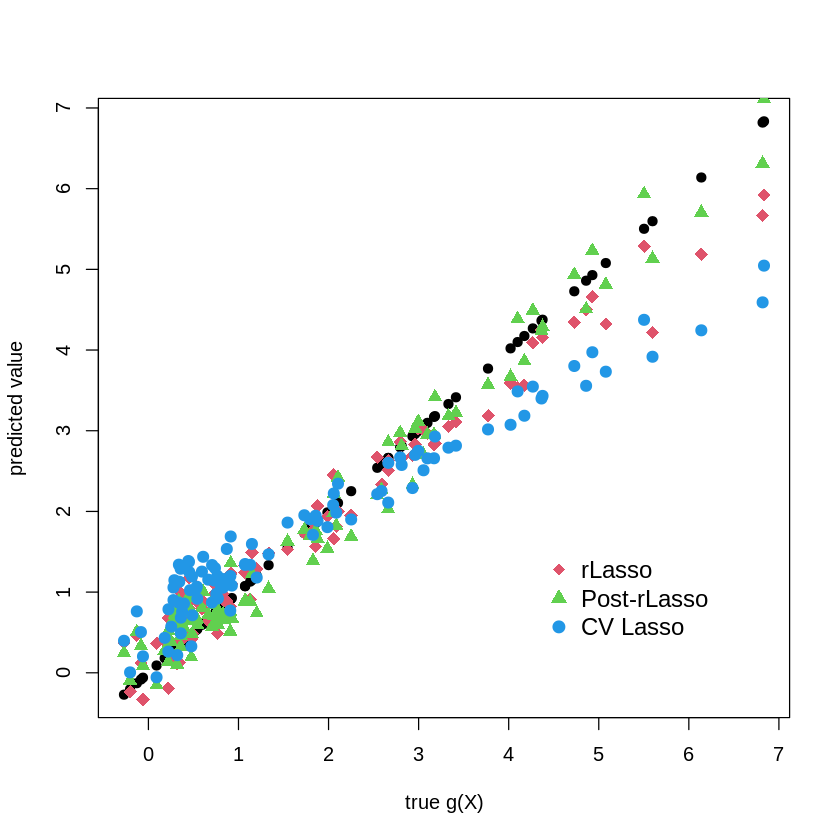

In [18]:

plot(gX, gX, pch=19, cex=1, ylab="predicted value", xlab="true g(X)")

points(gX, yhat.rlasso, col=2, pch=18, cex = 1.5 )
points(gX,  yhat.rlasso.post, col=3, pch=17,  cex = 1.2  )
points( gX, yhat.lasso.cv,col=4, pch=19,  cex = 1.2 )


legend("bottomright",
  legend = c("rLasso", "Post-rLasso", "CV Lasso"),
  col = c(2,3,4),
  pch = c(18,17, 19),
  bty = "n",
  pt.cex = 1.3,
  cex = 1.2,
  text.col = "black",
  horiz = F ,
  inset = c(0.1, 0.1))

